# Exploración de indicadores que reflejen la incidencia de Covid-19 en Venezuela usando fuentes de datos no oficiales

# GoFundMe - Análisis exploratorio

___ 

GoFundMe es una campaña de crowdfunding. El crowdfunding aprovecha el poder de las redes sociales e Internet para proporcionar a la gente medios para recaudar fondos, ayudar a otros a superar dificultades y lograr los objetivos a los que aspiran.

Este notebook de Jupyter contiene todo el código utilizado para la exploración de los datos obtenidos mediante web scrapping de GoFundMe.
___

## Configuración

Configurar el entorno importando las bibliotecas con las que se van trabajar. 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

Definir el estilo de las gráficas utilizando los siguientes `seaborn`.

In [36]:
# Para usar el estilo por defecto de seaborn
sns.set(rc={'figure.figsize':(11, 5)})
sns.set_style("white") #ponemos el fondo blanco

## Se cargan los datos:

In [37]:
df = pd.read_csv('../datos/datos_GoFundMe.csv', parse_dates = ['launch_date'], index_col= 0) #versión final

df.head() #echamos un primer vistazo

,tags,current amount,total_amount,currency used,current amount in dollars,total amount in dollars,percentage of completion,created,launch_date,country,donation_count,is_charity
0,"Medical, Illness & Healing",17550,50000.0,USD,17550.00,50000.00,35.100000,"Created April 2, 2021",2021-04-02,US,174,False
1,Volunteer & Service,5730,6000.0,USD,5730.00,6000.00,95.500000,"Created April 13, 2020",2020-04-13,US,148,False
2,"Medical, Illness & Healing",5350,5000.0,USD,5350.00,5000.00,107.000000,"Created April 25, 2020",2020-04-25,US,142,False
3,"Medical, Illness & Healing",3239,8000.0,USD,3239.00,8000.00,40.487500,"Created April 6, 2021",2021-04-06,US,37,False
4,Animals & Pets,1050,1800.0,EUR,1248.87,2140.92,58.333333,"Created July 5, 2020",2020-07-05,US,32,False


In [38]:
len(df.index)

2033

## Visualización de datos:

**Distribución de variables:**
* Paises
* Monedas
* Tags
* ¿Es caridad?

**Distribución de variables (agregados y por tags):**
* Monto total
* Monto actual 
* Tasa de avance recaudado 
* Tasa de adquisición donantes 

**Series de tiempo** 

Diferenciar por tags, tres categorias:
* Todas las categorías agregadas.
* Tags: Medical, illness & Healing
* Tags: Medical, illness & Healing + Accidents & Emergencies

Variables:
* Nuevas campañas
* Monto total diaria
* Monto total promedio

### Distribución de paises:

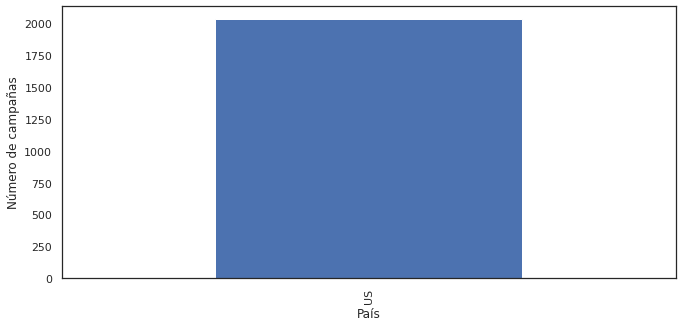

In [39]:
#visualicemos la distribución de paises
df.reset_index().groupby(['country']).count().reset_index().plot(x = 'country', y = 'index',  kind = 'bar', legend = False, 
                                                                 ylabel = 'Número de campañas', xlabel = 'País')
plt.show()

### Distribución de monedas

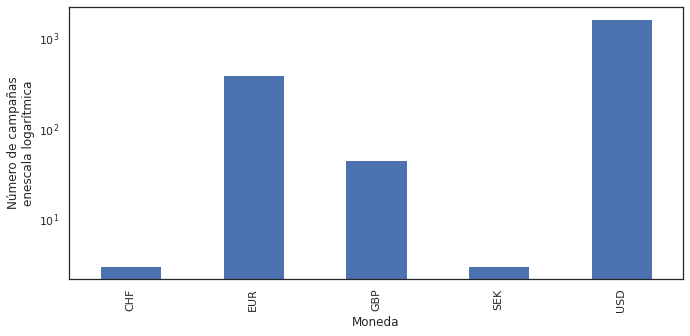

In [40]:
#visualicemos la distribución de monedas
df.reset_index().groupby(['currency used']).count().reset_index().plot(x = 'currency used', y = 'index', kind = 'bar', 
                                                                       legend = False, 
                                                                       ylabel = 'Número de campañas\nenescala logarítmica', 
                                                                       xlabel = 'Moneda', logy = True)
plt.show()

Por un lado ,se observa que todas las campañas provienen de Estados Unidos. Por el otro, al considerar la distribución de monedas vemos que muy probablemente los método de *webscrapping* implementados no son adecuados para identificar el país de procedencia de las campañas, ya que existe una proporción no despreciable de resultados usan euros como divisa. Las otras monedas, las cuales se usaron minoritariamente, también podrían indicar que las campañas se abrieron en más países. Estas monedas fueron: libra esterlina, franco suizo y corona sueca. Ahora bien, a pesar de la probable presencia de otros paises, es innegable que la gran mayoría de campañas utilizan dólares como moneda, lo que estaría confirmando que la gran mayoría de campañas vendrían de Estados Unidos. 

### Distribución de tags:

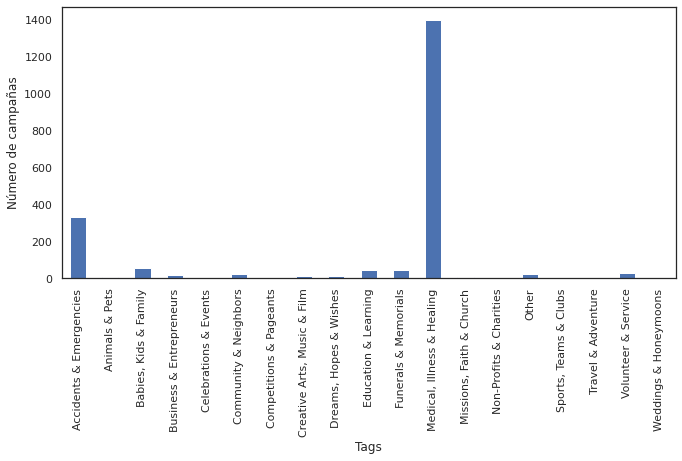

In [41]:
# visualicemos la distribución de tags
df.reset_index().groupby('tags').count().reset_index().plot(x = 'tags', y = 'index', kind = 'bar', legend = False, 
                                                            ylabel = 'Número de campañas', 
                                                            xlabel = 'Tags')
plt.show()

Por otra parte, vemos que, domo el covid es una enfermedad, no es sorpresa que la inmensa mayoría de campañas que concuerdan con las palabras de búsqueda: Venezuela, Covid estén en la categoría: Medical, Illness and Healing. Sin embargo debe considerarse que, al hacer una revisión manual se encontró que no todas las campañas que estaban en esta sección se hallaban directamente relacionadas a casos de covid-19. Adicionalmente, entre los datos habían campañas que sí estaban relacionadas a casos de covid-19 bajo otros tags, por ejemplo Accidents & Emergencies , lo cual representa un limitación en este trabajo. Este tipo de discrepancias y ambiguedades que se encuentran en los datos nos motivan a pensar que la incorporación de técnicas de minería de textos podrían ser útiles para identifcar las campañas de asociadas directamente a casos de covid-19, lo que permitiría la construcción de un indicador más robusto.

### ¿Es caridad?

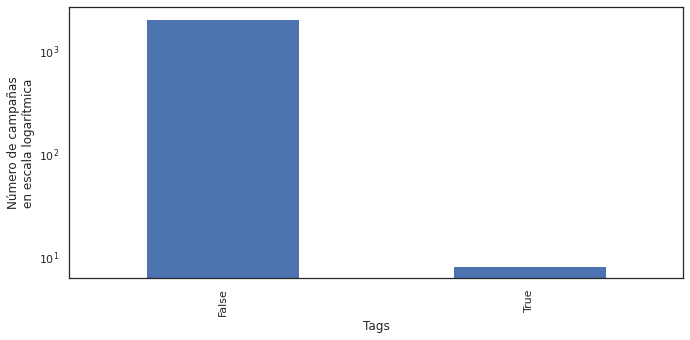

In [42]:
df.reset_index().groupby('is_charity').count().reset_index().plot(x = 'is_charity', y = 'index', kind = 'bar', 
                                                                  legend = False, 
                                                                  ylabel = 'Número de campañas\nen escala logarítmica', 
                                                                  xlabel = 'Tags', logy = True)
plt.show()

### Distribución de monto total y actual

Exploremos cuáles son las capañas más costosas

In [43]:
df.sort_values(by=['total amount in dollars'], ascending=False).head()

,tags,current amount,total_amount,currency used,current amount in dollars,total amount in dollars,percentage of completion,created,launch_date,country,donation_count,is_charity
1048,Business & Entrepreneurs,20000000,20000000.0,USD,2.000000e+07,2.000000e+07,100.000000,"Created March 2, 2021",2021-03-02,US,0,False
1601,NaN,350000,350000.0,USD,3.500000e+05,3.500000e+05,100.000000,Created 2 days ago,2021-05-09,US,0,False
1040,"Medical, Illness & Healing",250000,250000.0,GBP,3.469500e+05,3.469500e+05,100.000000,"Created April 12, 2021",2021-04-12,US,0,False
1304,Accidents & Emergencies,715,254000.0,USD,7.150000e+02,2.540000e+05,0.281496,"Created July 15, 2020",2020-07-15,US,13,False
1135,Accidents & Emergencies,5,250000.0,USD,5.000000e+00,2.500000e+05,0.002000,"Created November 3, 2020",2020-11-03,US,1,False


En este caso, la campaña que se encuentra en primera posición es un outlier que impide visualizar los demás datos de manera adecuada. En este orden de ideas, filtraremos este dato. 

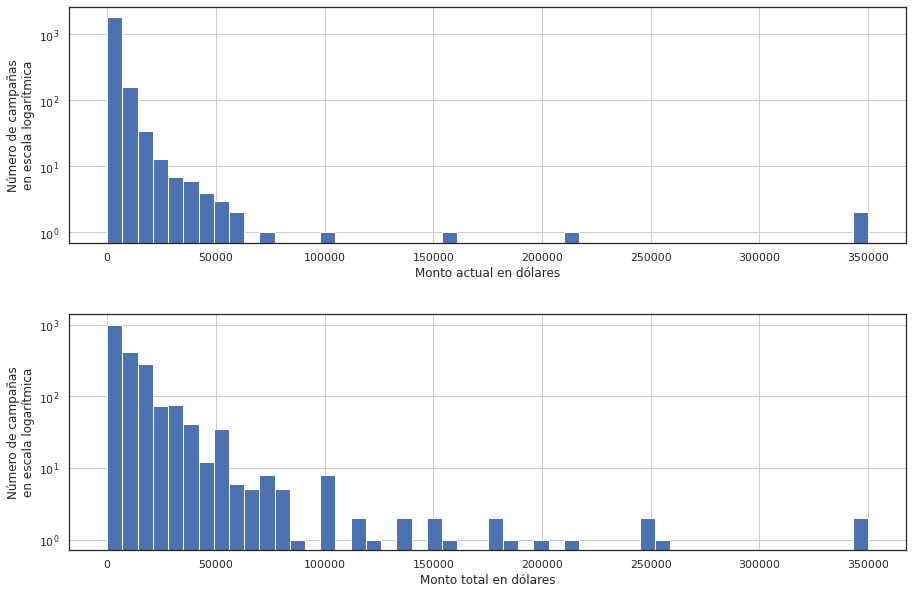

In [44]:
#arreglar esto (unique identifier)
axes = df.drop(labels=1048, axis=0).hist(column = ['current amount in dollars', 'total amount in dollars'], 
                                        bins = 50, log = True, layout = (2, 1), figsize = (15, 10))

eje_x = ['Monto actual en dólares','Monto total en dólares']
for i in range(2):
    axes[i][0].set_ylabel('Número de campañas\nen escala logarítmica')
    axes[i][0].set_xlabel(eje_x[i])
    axes[i][0].set_title('')
plt.tight_layout
plt.show()

#### Por tags:

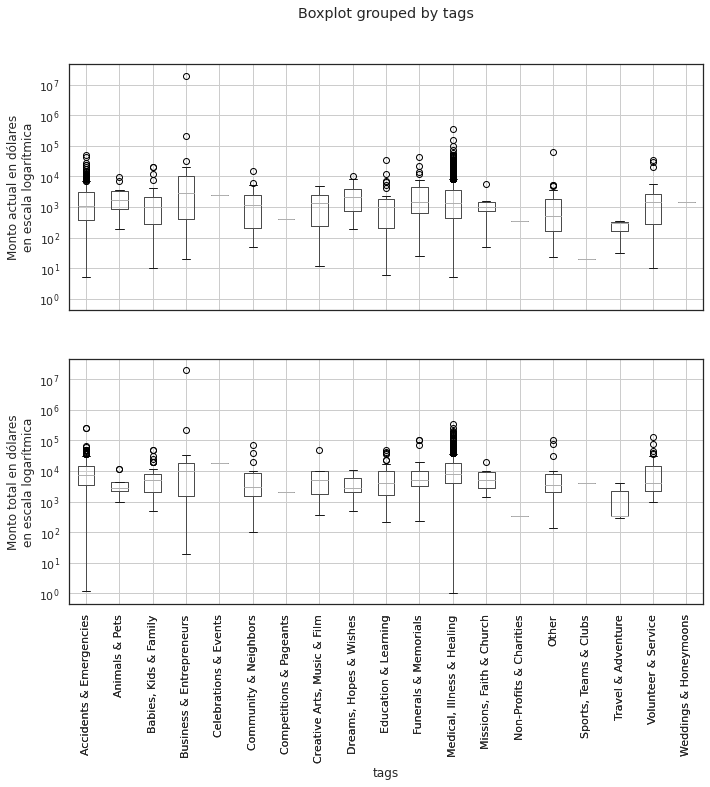

In [45]:
axes = df.boxplot(column = ['current amount in dollars', 'total amount in dollars'], by = 'tags', 
                                    layout = (2, 1), rot = 90, figsize = (11, 10))
eje_y = ['Monto actual en dólares\nen escala logarítmica','Monto total en dólares\nen escala logarítmica']
for i in range(2):
    axes[i].set_ylabel(eje_y[i])
    axes[i].set_title('')
    axes[i].set_yscale('log')
plt.show()

### Distribución de la tasa de avance de la campaña

Procedemos de manera análoga con el porcentaje de avance de la campaña:

In [46]:
df.sort_values(by=['percentage of completion'], ascending=False).head()

,tags,current amount,total_amount,currency used,current amount in dollars,total amount in dollars,percentage of completion,created,launch_date,country,donation_count,is_charity
476,"Medical, Illness & Healing",24444,1.0,USD,24444.000,1.0000,2.444400e+06,"Created March 31, 2021",2021-03-31,US,261,False
1698,Accidents & Emergencies,195,1.0,EUR,231.933,1.1894,1.950000e+04,"Created March 21, 2021",2021-03-21,US,8,False
881,Accidents & Emergencies,3348,1000.0,USD,3348.000,1000.0000,3.348000e+02,"Created July 10, 2020",2020-07-10,US,43,False
1946,Education & Learning,2250,1250.0,USD,2250.000,1250.0000,1.800000e+02,"Created June 30, 2020",2020-06-30,US,3,False
1212,"Medical, Illness & Healing",2585,1500.0,USD,2585.000,1500.0000,1.723333e+02,"Created January 24, 2021",2021-01-24,US,46,False


Ocurre algo similar al caso anterior, por lo tanto, prescindiremos de los datos con mayor porcentaje de avance para visualizar la distribución de esta variable. 

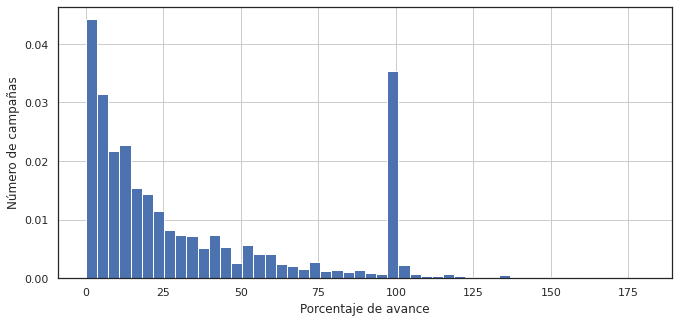

In [47]:
ax = df.drop(labels = [476, 1698, 881], axis=0).hist(column = ['percentage of completion'], bins = 50)

ax[0][0].set_ylabel('Número de campañas') #dejar esto en porcentaje
ax[0][0].set_xlabel('Porcentaje de avance')
ax[0][0].set_title('')
    
plt.show()
plt.show()

y agrupamos por tags:

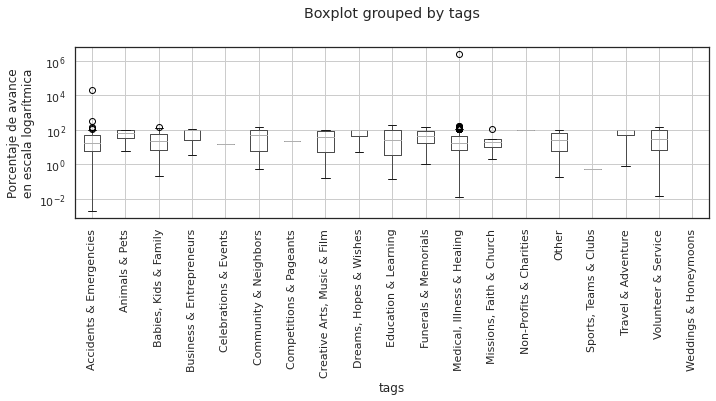

In [48]:
ax = df.boxplot(column = ['percentage of completion'], by = 'tags', 
                                    layout = (2, 1), rot = 90, figsize = (11, 7))
ax[0].set_ylabel('Porcentaje de avance\nen escala logarítmica')
ax[0].set_title('')
ax[0].set_yscale('log')
plt.show()

En las distribuciones de las variables numéricas: monto actual, monto total, porcentaje de avance y recuento de donaciones; se encontró en todos los casos una asimetría positiva con una moda muy cercana a cero y la presencia de algunas campañas con valores relativamente altos para las variables que se distribuyen. Para el número campañas lanzadas diariamente, la suma de las campañas lanzadas diariamente y el valores promedio de las campañas que se lanzan diariamente, se construyeron series de tiempo.

### Distribución de la tasa del número de donaciones:

In [49]:
df.sort_values(by=['donation_count'], ascending=False).head() # veamos si hay valores muy grandes

,tags,current amount,total_amount,currency used,current amount in dollars,total amount in dollars,percentage of completion,created,launch_date,country,donation_count,is_charity
1583,"Medical, Illness & Healing",160657,160657.0,USD,160657.0,160657.0,100.000000,"Created August 25, 2020",2020-08-25,US,1862,False
420,"Medical, Illness & Healing",29866,35000.0,USD,29866.0,35000.0,85.331429,"Created July 25, 2020",2020-07-25,US,1488,False
460,Funerals & Memorials,44068,100000.0,USD,44068.0,100000.0,44.068000,"Created August 19, 2020",2020-08-19,US,675,False
459,"Medical, Illness & Healing",12910,25000.0,USD,12910.0,25000.0,51.640000,"Created November 25, 2020",2020-11-25,US,583,False
435,Other,62421,75000.0,USD,62421.0,75000.0,83.228000,"Created February 16, 2020",2020-02-16,US,528,False


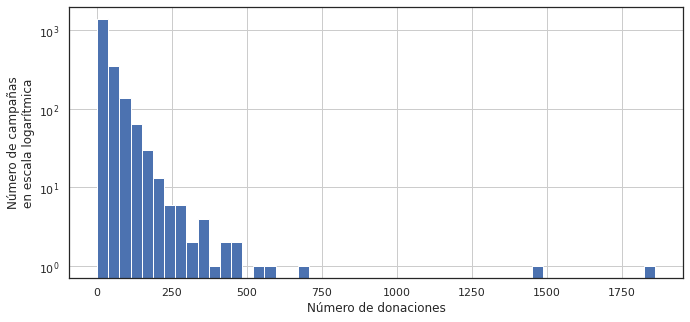

In [50]:
ax = df.hist(column = 'donation_count', bins = 50, log = True) #removemos los outliers
ax[0][0].set_ylabel('Número de campañas\nen escala logarítmica')
ax[0][0].set_xlabel('Número de donaciones')
ax[0][0].set_title('')
    
plt.show()
plt.show()

plt.show()

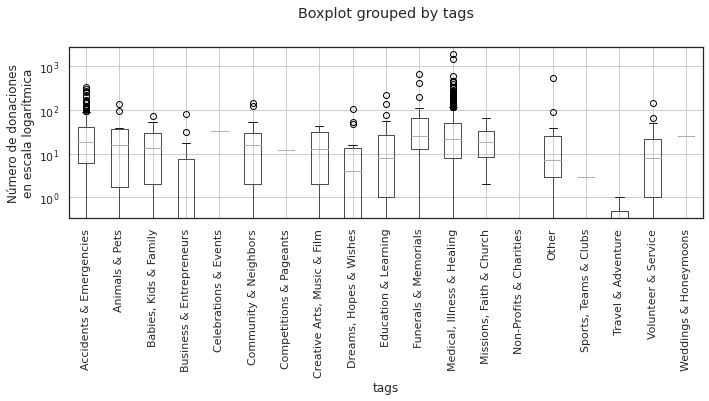

In [51]:
ax = df.boxplot(column = ['donation_count'], by = 'tags', layout = (2, 1), rot = 90, figsize = (11, 7))
ax[0].set_ylabel('Número de donaciones\nen escala logarítmica')
ax[0].set_title('')
ax[0].set_yscale('log')
plt.show()

## Series de tiempo

### Número de nuevas campañas 

In [52]:
# creamos un DataFrame con la serie de tiempo de interés
df_campañas = df.reset_index().pivot_table(values = 'index', index = 'launch_date', columns = 'tags', 
                         aggfunc = pd.Series.nunique, fill_value = 0)
df_campañas.head()

tags,Accidents & Emergencies,Animals & Pets,"Babies, Kids & Family",Business & Entrepreneurs,Celebrations & Events,Community & Neighbors,Competitions & Pageants,"Creative Arts, Music & Film","Dreams, Hopes & Wishes",Education & Learning,Funerals & Memorials,"Medical, Illness & Healing","Missions, Faith & Church",Non-Profits & Charities,Other,"Sports, Teams & Clubs",Travel & Adventure,Volunteer & Service,Weddings & Honeymoons
launch_date,,,,,,,,,,,,,,,,,,,
2020-01-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2020-02-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2020-02-17,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2020-02-24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


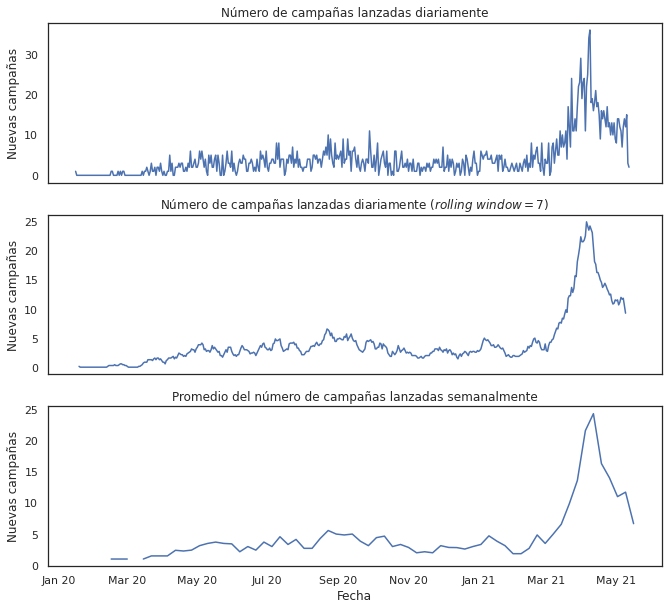

In [53]:
#tomamos muestras semanales y calculamos el promedio sobre estas muestra
serie_diaria = df_campañas.sum(axis = 1).resample('D').sum()
serie_rolling = serie_diaria.rolling(window=7, center=True).mean()
serie_semanal = df_campañas.sum(axis = 1).resample('W').mean()

#Graficamos la serie de tiempo
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

#serie_diaria
axes[0].plot(serie_diaria)
axes[0].set_title('Número de campañas lanzadas diariamente')

#serie_rolling
axes[1].plot(serie_rolling)
axes[1].set_title(r'Número de campañas lanzadas diariamente $(rolling$ $window=7) $')

#serie_semanal
axes[2].plot(serie_semanal)
axes[2].set_title(r'Promedio del número de campañas lanzadas semanalmente')

# Dar formato a las fechas
for ax in axes:
    ax.set_ylabel('Nuevas campañas') #agregamos label en el eje y

axes[2].set_xlabel('Fecha')
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.tight_layout
plt.show()

Aquí se exploraron 3 formas diferentes de visualizar la serie de tiempo. Nos quedaremos con la segunda (*rolling window = 7*):

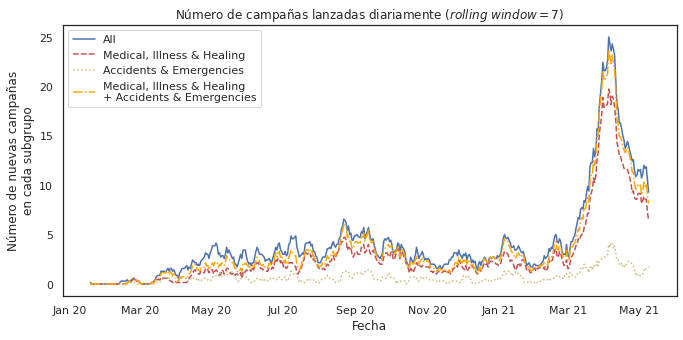

In [54]:
# creamos la figura
fig = plt.figure()
ax = fig.add_subplot(111)


# serie: total
serie_total = df_campañas.sum(axis = 1).resample('D').sum().rolling(window=7, center=True).mean()
ax.plot(serie_total, label = 'All')

# serie: Medical, illness & Healing
serie_salud = df_campañas['Medical, Illness & Healing'].resample('D').sum().rolling(window=7, center=True).mean()
ax.plot(serie_salud, label = 'Medical, Illness & Healing', ls = '--', color = 'r')

# serie: Accidents & Emergencies
serie_emergencia = df_campañas['Accidents & Emergencies'].resample('D').sum().rolling(window=7, center=True).mean()
ax.plot(serie_emergencia, label = 'Accidents & Emergencies', ls = ':', color = 'y')

# serie: Medical, illness & Healing + Accidents & Emergencies 
ax.plot(serie_salud + serie_emergencia, label = 'Medical, Illness & Healing\n+ Accidents & Emergencies', ls =  '-.',
        color = 'orange')

ax.set_title(r'Número de campañas lanzadas diariamente $(rolling$ $window=7) $')

ax.set_ylabel('Número de nuevas campañas\nen cada subgrupo')
ax.set_xlabel('Fecha')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.legend()
plt.show()

#se exportan las series de tiempo
columns = ['All', 'Medical, Illness & Healing', 'Accidents & Emergencies', 
           'Medical, Illness & Healing + Accidents & Emergencies']
df_exp = pd.concat([serie_total, serie_salud, serie_emergencia, 
                     serie_salud + serie_emergencia], axis=1).set_axis(columns, axis = 1).iloc[3:-3,:]
df_exp.to_csv('../datos/series_GoFundMe.csv') #escribimos el df

In [55]:
df_exp.head() #visualizamos los que exportamos 

,All,"Medical, Illness & Healing",Accidents & Emergencies,"Medical, Illness & Healing + Accidents & Emergencies"
launch_date,,,,
2020-01-19,0.142857,0.0,0.0,0.0
2020-01-20,0.000000,0.0,0.0,0.0
2020-01-21,0.000000,0.0,0.0,0.0
2020-01-22,0.000000,0.0,0.0,0.0
2020-01-23,0.000000,0.0,0.0,0.0


### Total del costo de las campañas lanzadas diariamente:

In [60]:
# creamos un DataFrame con la serie de tiempo de interés
dfmod = df.drop(labels=1048, axis=0) # eliminamos la campaña considerablemente costosa
df_costo_total = dfmod.pivot_table(values = 'total amount in dollars', index = 'launch_date', columns = 'tags', 
                         aggfunc = np.sum, fill_value = 0)
df_costo_total.head()

tags,Accidents & Emergencies,Animals & Pets,"Babies, Kids & Family",Business & Entrepreneurs,Celebrations & Events,Community & Neighbors,Competitions & Pageants,"Creative Arts, Music & Film","Dreams, Hopes & Wishes",Education & Learning,Funerals & Memorials,"Medical, Illness & Healing","Missions, Faith & Church",Non-Profits & Charities,Other,"Sports, Teams & Clubs",Travel & Adventure,Volunteer & Service,Weddings & Honeymoons
launch_date,,,,,,,,,,,,,,,,,,,
2020-01-16,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,10000.0,0,0.0,0.0,0
2020-02-16,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,75000.0,0,0.0,0.0,0
2020-02-17,0.0,0.0,5000.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0
2020-02-22,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,5000.0,0.0,0,0.0,0,0.0,0.0,0
2020-02-24,2500.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0


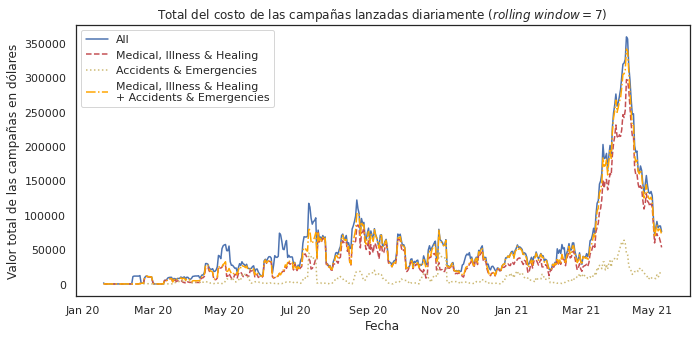

In [61]:
# creamos la figura
fig = plt.figure()
ax = fig.add_subplot(111)


# serie: total
serie_total = df_costo_total.sum(axis = 1).resample('D').sum().rolling(window=7, center=True).mean()
plt.plot(serie_total, label = 'All')

# serie: Medical, illness & Healing
serie_salud = df_costo_total['Medical, Illness & Healing'].resample('D').sum().rolling(window=7, center=True).mean()
plt.plot(serie_salud, label = 'Medical, Illness & Healing', ls = '--', color = 'r')

# serie: Accidents & Emergencies
serie_emergencia = df_costo_total['Accidents & Emergencies'].resample('D').sum().rolling(window=7, center=True).mean()
plt.plot(serie_emergencia, label = 'Accidents & Emergencies', ls = ':', color = 'y')

# serie: Medical, illness & Healing + Accidents & Emergencies 
plt.plot(serie_salud + serie_emergencia, label = 'Medical, Illness & Healing\n+ Accidents & Emergencies', ls = '-.', 
         color = 'orange')

plt.title(r'Total del costo de las campañas lanzadas diariamente $(rolling$ $window=7) $')

ax.set_ylabel('Valor total de las campañas en dólares')
ax.set_xlabel('Fecha')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.legend()
plt.show()

### Valor promedio de las campañas lanzadas diariamente:

In [63]:
df_costo_prom = dfmod.pivot_table(values = 'total amount in dollars', index = 'launch_date', columns = 'tags', 
                         aggfunc = np.mean, fill_value = 0)
df_costo_prom.head()

tags,Accidents & Emergencies,Animals & Pets,"Babies, Kids & Family",Business & Entrepreneurs,Celebrations & Events,Community & Neighbors,Competitions & Pageants,"Creative Arts, Music & Film","Dreams, Hopes & Wishes",Education & Learning,Funerals & Memorials,"Medical, Illness & Healing","Missions, Faith & Church",Non-Profits & Charities,Other,"Sports, Teams & Clubs",Travel & Adventure,Volunteer & Service
launch_date,,,,,,,,,,,,,,,,,,
2020-01-16,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,10000.0,0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,75000.0,0,0.0,0.0
2020-02-17,0.0,0.0,5000.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0
2020-02-22,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,5000.0,0.0,0,0.0,0,0.0,0.0
2020-02-24,2500.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0


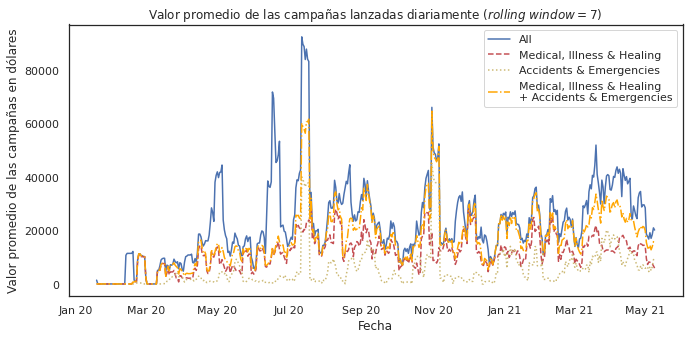

In [64]:
# creamos la figura
fig = plt.figure()
ax = fig.add_subplot(111)


# serie: total
serie_total = df_costo_prom.sum(axis = 1).resample('D').sum().rolling(window=7, center=True).mean()
plt.plot(serie_total, label = 'All')

# serie: Medical, illness & Healing
serie_salud = df_costo_prom['Medical, Illness & Healing'].resample('D').sum().rolling(window=7, center=True).mean()
plt.plot(serie_salud, label = 'Medical, Illness & Healing', ls = '--', color = 'r')

# serie: Accidents & Emergencies
serie_emergencia = df_costo_prom['Accidents & Emergencies'].resample('D').sum().rolling(window=7, center=True).mean()
plt.plot(serie_emergencia, label = 'Accidents & Emergencies', ls = ':', color = 'y')

# serie: Medical, illness & Healing + Accidents & Emergencies 
plt.plot(serie_salud + serie_emergencia, label = 'Medical, Illness & Healing\n+ Accidents & Emergencies', ls = '-.', 
         color = 'orange')

plt.title(r'Valor promedio de las campañas lanzadas diariamente $(rolling$ $window=7) $')

ax.set_ylabel('Valor promedio de las campañas en dólares')
ax.set_xlabel('Fecha')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.legend()
plt.show()

Como se buscan indicadores que reflejen el estado de la pandemia, los dos candidatos evidentes serían el número de campañas lanzadas diariamente y la suma del valor de las campañas lanzadas diariamente. Sin embargo, esta última variable presenta un problema, ya que las fluctuaciones en el valor promedio de las campañas, el cual parece estar no guardar correlación con el número de casos (comparar las estimaciones del IHME con la figura (9)) influye mucho en el esta variable, lo cual estaría generando un ruido adicional que dificultaría la detección eficaz de picos epidemiológicos. Por último, entre los 4 subconjuntos que se presentan, se observa que los datos de la categoría `Medical, Illnes & Healing` son los que guardarían una mejor correlación con el número de casos de la pandamia en venezuela. Por tal motivo, escogemos solamente a este subconjuto como indicador.